# Regression Tree

### 데이터셋 및 필요 패키지 로드

In [5]:
from sklearn.datasets import load_boston as boston

import pandas as pd

In [3]:
bos = boston()
print(bos.DESCR[:1200])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# 설명변수와 종속변수 설정

X = bos['data']
y = bos['target']
col_names = bos.feature_names

boston_x = pd.DataFrame(data=X, columns= col_names)
boston_x['MEDV'] = y
y = boston_x.MEDV.copy()
del boston_x['MEDV']
boston = pd.concat((boston_x,y), axis=1)

In [7]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# 변수 타입 확인
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

### 탐색적 분석

In [9]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [10]:
# plot 예시 
for col in ['ZN', 'NOX','CHAS', 'RAD', 'PTRATIO','AGE', 'DIS', 'TAX' ,'B']:
    del boston[col]

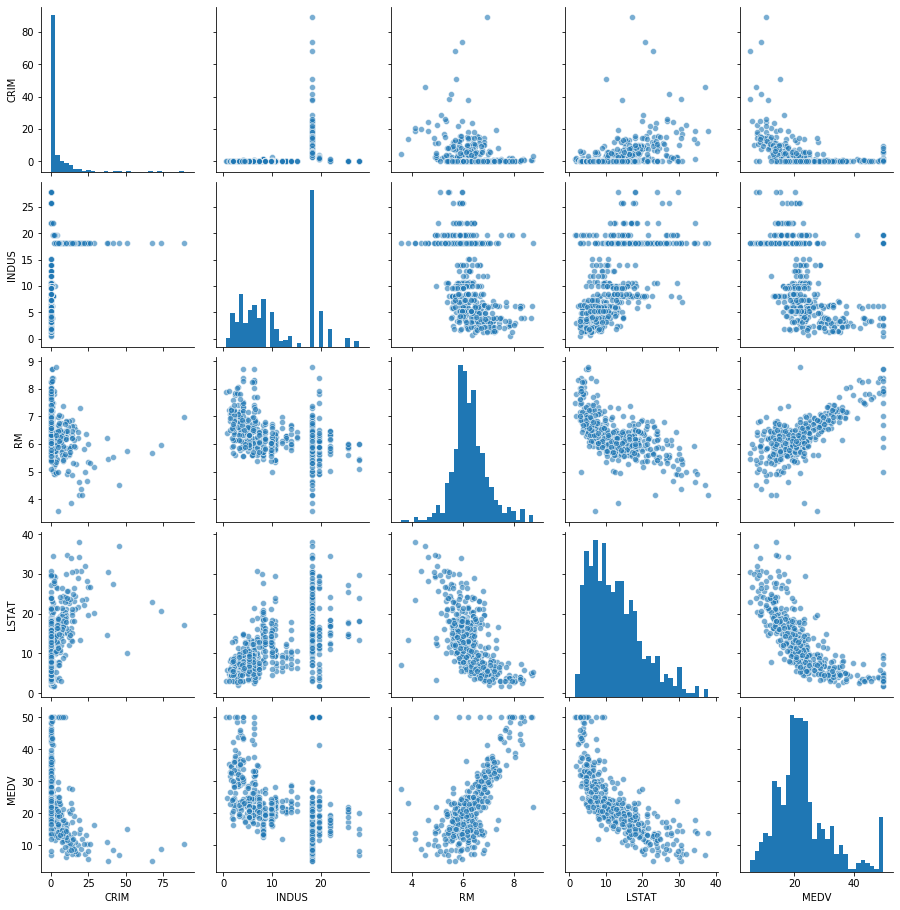

In [11]:
# x와 y의 종합 관계식을 pairplot을 통해 볼 수 있음
# 그림은 scatter plot과 histogram으로 표현됨
import seaborn as sns
sns.pairplot(boston, plot_kws={'alpha':0.6}, diag_kws={'bins':30})

### Regression Tree 분석

In [12]:
# Data를 train test로 나누기
from sklearn.model_selection import train_test_split

In [13]:
# data split용, random_state: random index를 고정시킬 때 주로 사용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.tree import DecisionTreeRegressor as dtr

In [25]:
test_reg = dtr(max_depth=4)
test_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [26]:
#from sklearn.externals.six import StringIO
from six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image
import graphviz

In [27]:
# 문자열 데이터를저장하는 역할
dot_file =StringIO()

# export_graphviz: tree 시각화용
# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, out_file - 어떤 데이터를 보일지
tree.export_graphviz(test_reg, feature_names=col_names, out_file = dot_file, filled =True)

# Data를 graph로 표시하기 위해 Dot class로 변환
graph=pydotplus.graph_from_dot_data(dot_file.getvalue())

#dot_file.getvalue(): 데이터가 어떻게 들어가는지 볼 수 있음.
#dot_file.getvalue() # 실행시 그래프가 문자열로 나타남 

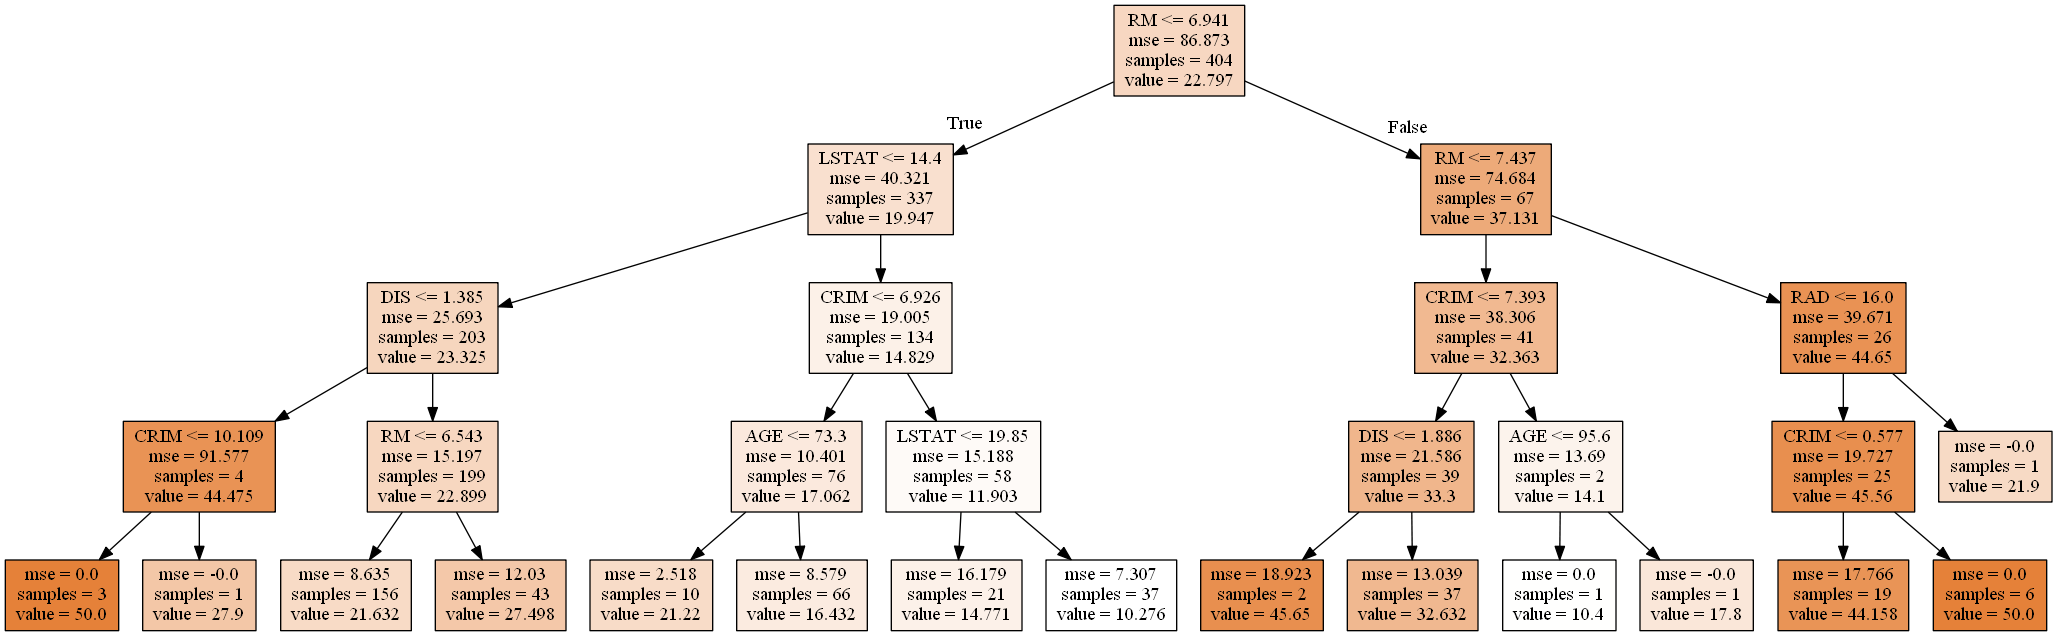

In [28]:
Image(graph.create_png())

In [ ]:
# jpg로 내보내기
graph.write_png("DT.jpg")

In [30]:
print("훈련 세트 정확도: {:.3f}".format(test_reg.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(test_reg.score(X_test, y_test)))

훈련 세트 정확도: 0.888
테스트 세트 정확도: 0.855


depth를 더 늘린 후, 훈련 데이터세트 MSE와 테스트 데이터세트 MSE를 구해보았음

In [34]:
test_reg2 = dtr(max_depth=30)
test_reg2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=30)

In [35]:
print("훈련 세트 정확도: {:.3f}".format(test_reg2.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(test_reg2.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.683


### Pruning

가기치기 과정은 Tree 모델의 과적합을 방지하고 예측 오차를 줄이기 위해 적정선에서 트리를 더이상 분기하지 않도록 하는 방법 

In [36]:
# max_depth, min_samples_split, min_samples_leaf과 같은 파라미터를 설정시

# depth를 끝까지 내려도 설정해둔 값들 때문에 overfitting되는 것을 방지할 수 있음 

# min_samples_split: 분기 시 최소한의 sample수를 충족해야 할 때 쓰임

# min_samples_leaf: 분기 후 node가 최소한의 sample수를 충족해야 할 때 쓰임

reg_tree_ad = dtr(max_depth=1000, min_samples_split=30, min_samples_leaf=10, random_state=1004)
reg_tree_ad.fit(X_train,y_train) #criterion='mse'

DecisionTreeRegressor(max_depth=1000, min_samples_leaf=10, min_samples_split=30,
                      random_state=1004)

In [37]:
# max_depth와 min_samples_split, min_samples_leaf 조절했을 때 #
dot_file =StringIO()

# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, out_file - 어떤 
tree.export_graphviz(reg_tree_ad, feature_names=col_names, out_file = dot_file, filled =True)

graph=pydotplus.graph_from_dot_data(dot_file.getvalue())

graph.set_size('"100,100!"')

#dot 형식으로 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 

Image(graph.create_png())

In [38]:
print("훈련 세트 정확도: {:.3f}".format(reg_tree_ad.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(reg_tree_ad.score(X_test, y_test)))

훈련 세트 정확도: 0.828
테스트 세트 정확도: 0.764


적절히 가지치기 한 후의 모델의 max depth가 30일 때보다 예측에서 더 나은 성능을 보임.